In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pyneb as pn


In [3]:
H1 = pn.RecAtom('H', 1)   #defeiniu o hidrogênio nêutro

In [4]:
pn.atomicData.getDataFile('H1', 'rec')     #Importou os dados necessários

'h_i_rec_SH95.hdf5'

In [5]:
pn.atomicData.getAllAtoms(coll=False, rec=True)   #Lista os ions de linhas de recombinação

['H1',
 'He1',
 'He2',
 'C1',
 'C2',
 'C3',
 'C4',
 'N1',
 'N2',
 'N3',
 'N4',
 'Ne2',
 'O1',
 'O2',
 'O3',
 'O4',
 'O5',
 'N5',
 'O6']

In [6]:
Hbeta = H1.getEmissivity(tem=1e4, den=1e3, lev_i=4, lev_j=2)
Halpha = H1.getEmissivity(tem=1e4, den=1e3, lev_i=3, lev_j=2)
print(Halpha/Hbeta)

2.856911883589329


In [7]:
print(H1.getEmissivity([1e4, 1.8e4], [1e4, 1e2], lev_i = 4, lev_j = 2))

[[1.24000000e-25 1.23500000e-25]
 [7.26633333e-26 7.25266667e-26]]


In [8]:
print(H1.getEmissivity([1e4, 1.8e4], [1e4, 1e2], label='4_2'))

[[1.24000000e-25 1.23500000e-25]
 [7.26633333e-26 7.25266667e-26]]


In [9]:
print(H1.getEmissivity([1e4, 1.8e4], [1e4, 1e2], label='4_2', product=False))

[1.24000000e-25 7.25266667e-26]


In [10]:
He1 = pn.RecAtom('He', 1)
print(He1.getEmissivity(1e4, 1e2, wave=4471.0))
print(He1.getEmissivity(1e4, 1e2, label='4471.0'))


6.11561306801098e-26
6.11561306801098e-26


In [11]:
H1.labels[0:10]


('2_1', '3_1', '3_2', '4_1', '4_2', '4_3', '5_1', '5_2', '5_3', '5_4')

In [12]:
He1.labels[0:10]

('2945.0',
 '3188.0',
 '3614.0',
 '3889.0',
 '3965.0',
 '4026.0',
 '4121.0',
 '4388.0',
 '4438.0',
 '4471.0')

In [13]:
tem = np.linspace(5000, 20000, 100)
den = np.logspace(2, 6, 50)
im_Hab = (H1.getEmissivity(tem, den, label='3_2') / H1.getEmissivity(tem, den, label='4_2'))
print(im_Hab.shape)
print(np.min(im_Hab))
print(np.max(im_Hab))

(100, 50)
2.7245237375264586
3.040927694406548


In [14]:
pn.atomicData.setDataFile('h_i_rec_SH95-caseA.hdf5')

In [15]:
H1_A = pn.RecAtom('H', 1)

In [16]:
im_caseAoverB = (H1_A.getEmissivity(tem, den, label='4_2')/H1.getEmissivity(tem, den, label='4_2'))

In [17]:
O2 = pn.RecAtom('O', 2)

In [18]:
V1_mult = ('4638.86', '4641.81', '4649.13', '4650.84', '4661.63', '4673.73', '4676.23', '4696.35')


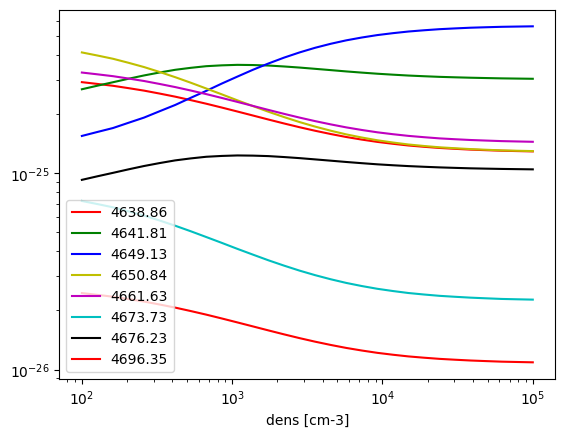

In [19]:
cols = 'rgbymckrgbymckr'
temps = 1e4
dens = np.logspace(2, 5, 30)
f, ax = plt.subplots()
for j, label in enumerate(V1_mult):
    ax.loglog(dens, O2.getEmissivity(temps, dens, label=label), label=label, c=cols[j])
ax.set_xlabel('dens [cm-3]')
ax.legend(loc='best');

In [20]:
O3c = pn.Atom('O',3)
O2r = pn.RecAtom('O',2)
tem = 1e4
den = 1e2
Opp_col = O3c.getIonAbundance(int_ratio=127, tem=tem, den=den, wave=5007)
Opp_rec = O2r.getIonAbundance(int_ratio=.023, tem=tem, den=den, label='4649.13')
print("""12+log(O++/H) from recombination line: {:.2f}, 
12+log(O++/H) from collisional line: {:.2f}, 
ADF: {:.1f}""".format(12+np.log10(Opp_rec), 12+np.log10(Opp_col), Opp_rec / Opp_col))

12+log(O++/H) from recombination line: 8.09, 
12+log(O++/H) from collisional line: 7.48, 
ADF: 4.1
